<a href="https://colab.research.google.com/github/Deepak14ap/Image_Noise_Removal/blob/main/Image_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Encoder-Decoder Network**

# Encoder-Decoder automatically consists of two structures: the encoder and the decoder. The encoder network downsamples the data into lower dimensions and the decoder network reconstructs the original data from the lower dimension representation. The lower dimension representation is usually called latent space representation.

![alt text](https://cdn-images-1.medium.com/max/1000/1*8ixTe1VHLsmKB3AquWdxpQ.png)

# Load Libraries

In [12]:
from matplotlib import pyplot as plt
import numpy as np
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.datasets import mnist

import os
import tensorflow as tf
from tqdm.notebook import tqdm


# Load Dataset in Numpy Format

MNIST is a simple computer vision dataset. It consists of images of handwritten digits. It also includes labels for each image, telling us which digit it is.
The MNIST data is split into two parts: 60,000 data points of training data, and 10,000 points of test data. Each image is 28 pixels by 28 pixels.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


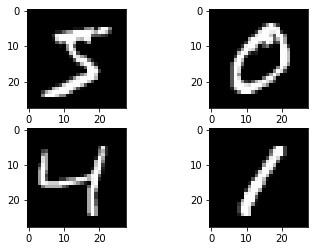

In [3]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

# Formatting Data for Keras

In [4]:
# forcing the precision of the pixel values to be 32 bit
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

X_train = X_train[:,:,:,np.newaxis]
X_test = X_test[:,:,:,np.newaxis]

# Splitting Data into Training, and Validation

In [5]:
from sklearn.model_selection import train_test_split

#Splitting the trining data into training and validation

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

## Adding Noise to Images

Let's first define a noise factor which is a hyperparameter. The noise factor is multiplied with a random matrix that has a mean of 0.0 and standard deviation of 1.0. This matrix will draw samples from normal (Gaussian) distribution. The shape of the random normal array will be similar to the shape of the data you will be adding the noise.

In [6]:
noise_factor = 0.2
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_valid_noisy = X_val + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_val.shape)
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_valid_noisy = np.clip(x_valid_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Visualizing the noisy images

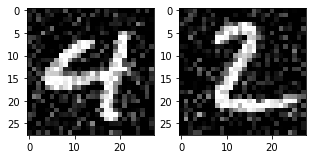

In [7]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train_noisy[1], (28,28))
plt.imshow(curr_img, cmap='gray')

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test_noisy[1], (28,28))
plt.imshow(curr_img, cmap='gray')

# Denoising Encoder-Decoder Network

In [31]:
epochs = 50

inChannel = 1

batch_size = 128

x, y = 28, 28

input_img = Input(shape = (x, y, inChannel))
autoencoder = tf.keras.models.Sequential()
#Layer 1
autoencoder.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', input_shape = (28, 28, 1)))
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 3
autoencoder.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 4
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 5
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 6
autoencoder.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 7
autoencoder.add(tf.keras.layers.Conv2D(filters = 16, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 8
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 32, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 9
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 64, kernel_size = (3,3), padding = 'same'))
autoencoder.add(tf.keras.layers.BatchNormalization())
autoencoder.add(tf.keras.layers.LeakyReLU(alpha = 0.01))
#Layer 11
autoencoder.add(tf.keras.layers.Conv2DTranspose(filters = 1, kernel_size = (3,3), activation = 'sigmoid', padding = 'same'))

In [32]:
autoencoder.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        18464     
_________________________________________________________________
batch_normalization_14 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 16)        4624      
_________________________________________________________________
batch_normalization_15 (Batc (None, 28, 28, 16)       

# Build the model and compile

In [33]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Training

In [35]:
history = autoencoder.fit(x_train_noisy, X_train, validation_data=(x_valid_noisy, X_val), batch_size=batch_size,epochs=epochs)

Epoch 1/50
375/375 [==============================] - 11s 28ms/step - loss: 0.0841 - val_loss: 0.1112
Epoch 2/50
375/375 [==============================] - 10s 26ms/step - loss: 0.0688 - val_loss: 0.0689
Epoch 3/50
375/375 [==============================] - 10s 27ms/step - loss: 0.0684 - val_loss: 0.0686
Epoch 4/50
375/375 [==============================] - 10s 27ms/step - loss: 0.0681 - val_loss: 0.0681
Epoch 5/50
375/375 [==============================] - 10s 26ms/step - loss: 0.0680 - val_loss: 0.0682
Epoch 6/50
375/375 [==============================] - 10s 26ms/step - loss: 0.0679 - val_loss: 0.0679
Epoch 7/50
375/375 [==============================] - 10s 26ms/step - loss: 0.0678 - val_loss: 0.0679
Epoch 8/50
375/375 [==============================] - 10s 26ms/step - loss: 0.0678 - val_loss: 0.0678
Epoch 9/50
375/375 [==============================] - 10s 26ms/step - loss: 0.0677 - val_loss: 0.0678
Epoch 10/50
375/375 [==============================] - 10s 26ms/step - loss: 0.067

# Train versus Validation Loss Plot

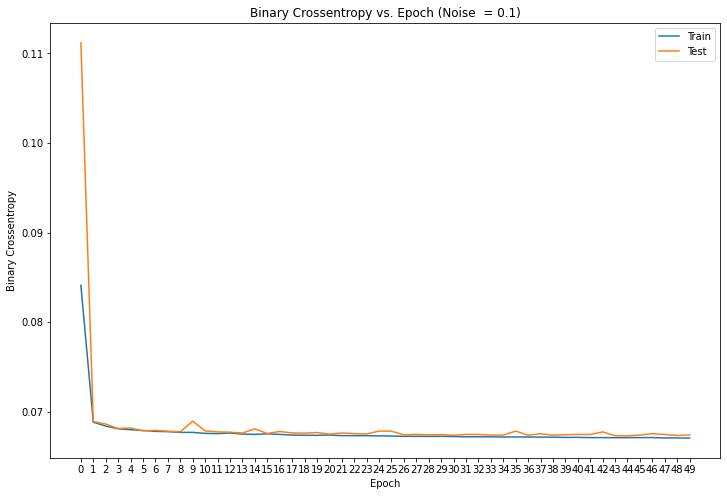

In [36]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'])
plt.title('Binary Crossentropy vs. Epoch (Noise  = 0.1)')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy')
plt.xticks(ticks=history.epoch, labels=history.epoch)
plt.show()

# Predicting on Test dataset

In [37]:
pred = autoencoder.predict(x_test_noisy)

Test Images


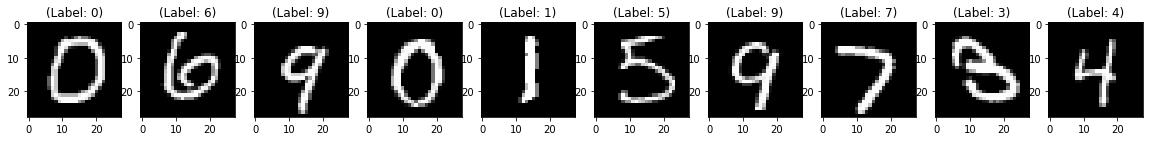

Test Images with Noise


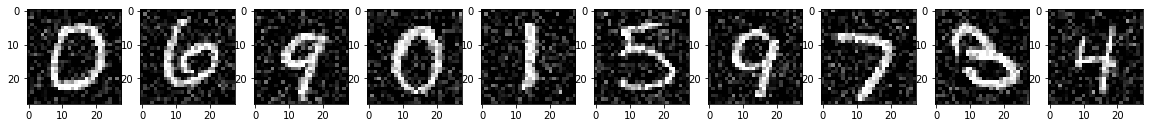

Reconstruction of Noisy Test Images


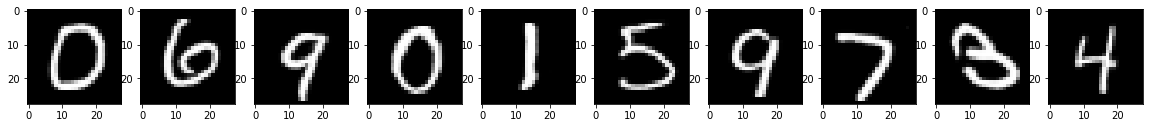

In [38]:
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i, ..., 0]*255, cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i, ..., 0]*255, cmap='gray')
plt.show()    

plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i, ..., 0]*255, cmap='gray')  
plt.show()